In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

from keras.models import load_model

Using TensorFlow backend.


In [3]:
os.chdir('E:/learning/datasets/MNIST Digits/')

In [4]:
X_train=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')

In [5]:
print(X_train.shape)

(42000, 785)


In [6]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train=X_train.label
X_train.drop('label',axis=1, inplace=True)

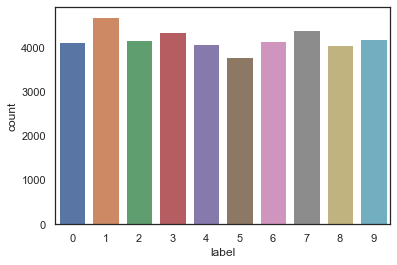

In [8]:
sns.countplot(y_train);

In [9]:
y_train.shape

(42000,)

In [10]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train /= 255
X_test /=255

In [13]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [14]:
X_train.shape,X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [15]:
y_train=to_categorical(y_train, num_classes=10)

In [16]:
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.2,random_state=42)

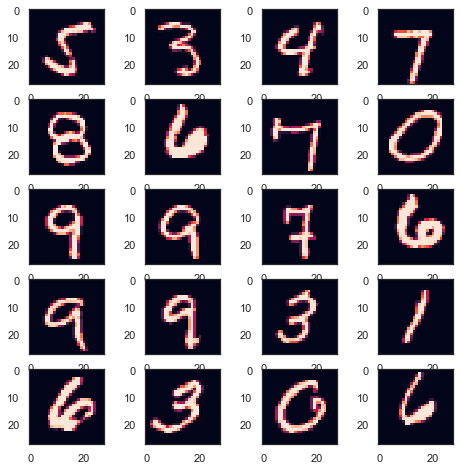

In [17]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, rows*columns +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i][:,:,0])
plt.show()

In [18]:
model=Sequential([
      Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
      Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Dropout(0.2),
    
      Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
      Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Dropout(0.2),
    
      Flatten(),
      Dense(512,activation='relu'),
      Dropout(0.4),
      Dense(256,activation='relu'),
      Dropout(0.4),
      Dense(10,activation='softmax')]
      
      )

model.summary()

W0901 20:16:25.654476  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 20:16:25.711480  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 20:16:25.727481  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 20:16:25.810534  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0901 20:16:25.818538  3248 deprecation_wrapper.py:119] From C:\ProgramData\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [19]:
optimizer=RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

W0901 20:16:26.118556  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 20:16:26.133560  3248 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
lr_fall=ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,verbose=1,min_lr=0.00001)

es=EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=5)

mc=ModelCheckpoint('MNIST_model_gen1.h5',monitor='val_acc',mode='max', verbose=1, save_best_only=True)

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Training Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  plt.legend()

  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.legend()

W0901 20:16:26.334575  3248 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 139s 4ms/step - loss: 0.2350 - acc: 0.9241 - val_loss: 0.0554 - val_acc: 0.9817

Epoch 00001: val_acc improved from -inf to 0.98167, saving model to MNIST_model_gen1.h5
Epoch 2/30
33600/33600 [==============================] - 139s 4ms/step - loss: 0.0741 - acc: 0.9791 - val_loss: 0.0548 - val_acc: 0.9838

Epoch 00002: val_acc improved from 0.98167 to 0.98381, saving model to MNIST_model_gen1.h5
Epoch 3/30
33600/33600 [==============================] - 138s 4ms/step - loss: 0.0589 - acc: 0.9831 - val_loss: 0.0365 - val_acc: 0.9886

Epoch 00003: val_acc improved from 0.98381 to 0.98857, saving model to MNIST_model_gen1.h5
Epoch 4/30
33600/33600 [==============================] - 136s 4ms/step - loss: 0.0519 - acc: 0.9854 - val_loss: 0.0432 - val_acc: 0.9871

Epoch 00004: val_acc did not improve from 0.98857
Epoch 5/30
33600/33600 [==============================] - 140s 4ms/step - l

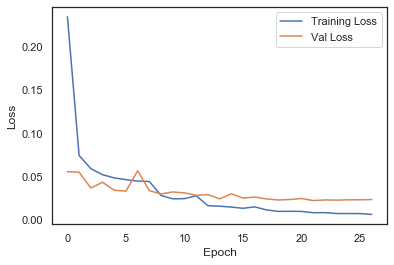

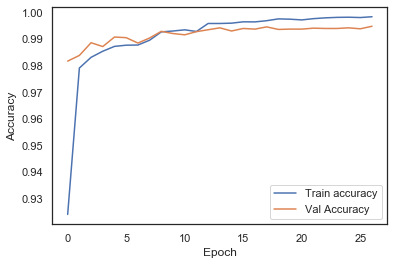

In [22]:
history=model.fit(X_train,y_train, 
                  batch_size=64, 
                  epochs=30, 
                  validation_data=(X_val,y_val),
                  verbose=1,
                 callbacks=[lr_fall,es,mc])

plot_history(history)

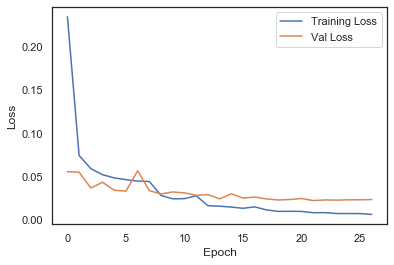

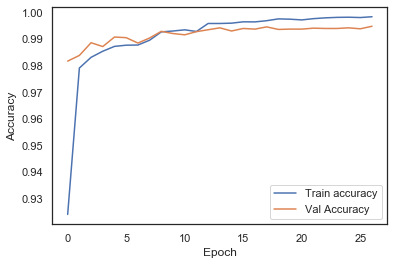

In [23]:
plot_history(history)


In [24]:
X_test.shape

(28000, 28, 28, 1)

In [25]:
results= model.predict(X_test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name='label')

submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)
submission.to_csv("MNIST_gen1.csv",index=False)

In [31]:
out=pd.read_csv('MNIST_gen1.csv')
out.head(10)

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


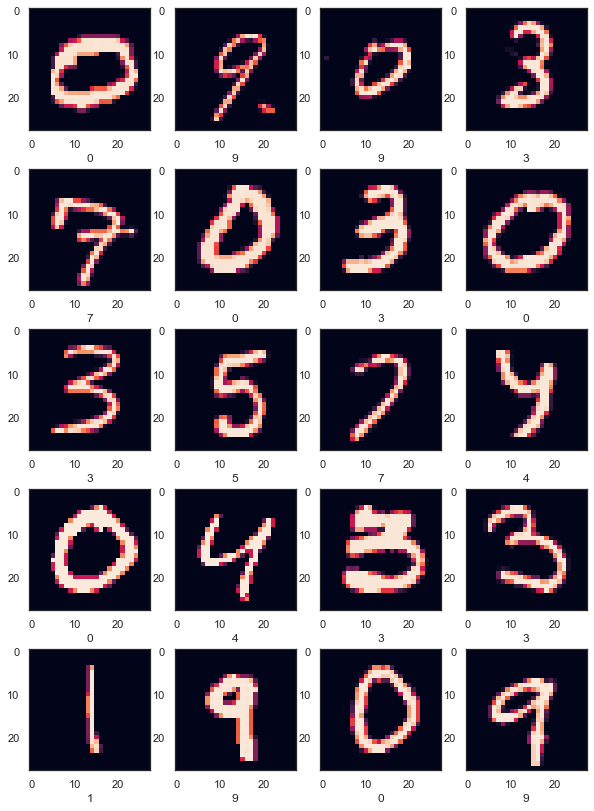

In [38]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, rows*columns +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i][:,:,0])
    plt.xlabel(out.label[i]);
    plt.subplots_adjust(top=1.2)
plt.show()

In [45]:
model2=Sequential([
      Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
      Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Dropout(0.2),
    
      Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
      Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Dropout(0.2),
    
      Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
      Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Dropout(0.2),
    
    
      Flatten(),
      Dense(512,activation='relu'),
      Dropout(0.4),
      Dense(256,activation='relu'),
      Dropout(0.4),
      Dense(10,activation='softmax')]
      
      )

optimizer=RMSprop()
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [49]:
lr_fall2=ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,verbose=1,min_lr=0.00001)

es2=EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=5)

mc2=ModelCheckpoint('MNIST_model_gen2.h5',monitor='val_acc',mode='max', verbose=1, save_best_only=True)

In [46]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        )

In [47]:
datagen.fit(X_train)

In [50]:
history = model2.fit_generator(datagen.flow(X_train,y_train, batch_size=64),
                              epochs = 30, 
                              validation_data = (X_val,y_val),
                              verbose = 1,
                              steps_per_epoch=X_train.shape[0] // 64,
                              callbacks=[lr_fall2,es2,mc2])

Epoch 1/30
525/525 [==============================] - 197s 375ms/step - loss: 0.1146 - acc: 0.9675 - val_loss: 0.0474 - val_acc: 0.9882

Epoch 00001: val_acc improved from -inf to 0.98821, saving model to MNIST_model_gen2.h5
Epoch 2/30
525/525 [==============================] - 204s 389ms/step - loss: 0.0944 - acc: 0.9743 - val_loss: 0.0358 - val_acc: 0.9900

Epoch 00002: val_acc improved from 0.98821 to 0.99000, saving model to MNIST_model_gen2.h5
Epoch 3/30
525/525 [==============================] - 202s 385ms/step - loss: 0.0840 - acc: 0.9767 - val_loss: 0.0290 - val_acc: 0.9913

Epoch 00003: val_acc improved from 0.99000 to 0.99131, saving model to MNIST_model_gen2.h5
Epoch 4/30
525/525 [==============================] - 201s 383ms/step - loss: 0.0892 - acc: 0.9784 - val_loss: 0.0408 - val_acc: 0.9904

Epoch 00004: val_acc did not improve from 0.99131
Epoch 5/30
525/525 [==============================] - 188s 357ms/step - loss: 0.0852 - acc: 0.9790 - val_loss: 0.0510 - val_acc: 0.9

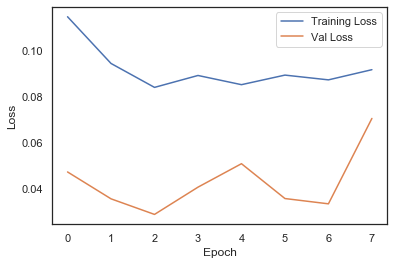

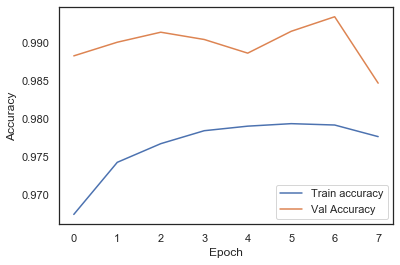

In [51]:
plot_history(history)

In [52]:
results= model2.predict(X_test)
results=np.argmax(results,axis=1)
results=pd.Series(results,name='label')

submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),results],axis=1)
submission.to_csv("MNIST_gen2.csv",index=False)